In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/cat_ab_population_cpi_features.csv')

df.head()

,date,category,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,...,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change,month,bid_quota_ratio,quota_pct_change,price_pct_change,total_bids_pct_change,success_bids_pct_change
0,2014-02-19,Cat A (Cars up to 1600cc and 97kW),362,77201,700,358,341169.0,754.0,1104.0,114.830,...,94.412,0.4,0.6,0.0,2,1.933702,0.000000,0.078769,-0.026426,0.005618
1,2014-03-05,Cat A (Cars up to 1600cc and 97kW),365,76999,615,356,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.684932,0.008287,-0.002617,-0.121429,-0.005587
2,2014-03-19,Cat A (Cars up to 1600cc and 97kW),362,78602,577,360,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.593923,-0.008219,0.020818,-0.061789,0.011236
3,2014-04-09,Cat A (Cars up to 1600cc and 97kW),367,77400,537,360,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.463215,0.013812,-0.015292,-0.069324,0.000000
4,2014-04-23,Cat A (Cars up to 1600cc and 97kW),361,71335,513,357,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.421053,-0.016349,-0.078359,-0.044693,-0.008333


In [2]:
df.columns

Index(['date', 'category', 'quota', 'price', 'total_bids', 'success_bids',
       'population', 'registration', 'deregistration', 'cpi_car',
       'cpi_transport', 'cpi_petrol', 'cpi_car_pct_change',
       'cpi_transport_pct_change', 'cpi_petrol_pct_change', 'month',
       'bid_quota_ratio', 'quota_pct_change', 'price_pct_change',
       'total_bids_pct_change', 'success_bids_pct_change'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

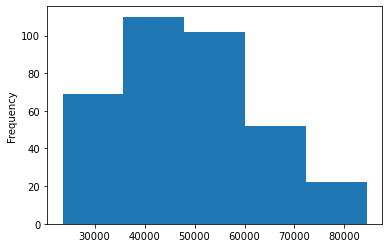

In [3]:
#Check if distribution of dependent variable conforms to normal distribution
df['price'].plot.hist(bins = 5)

<AxesSubplot:ylabel='Frequency'>

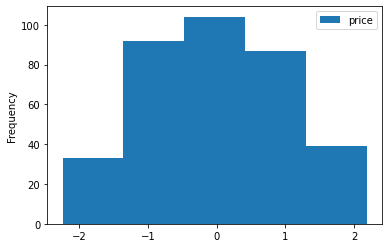

In [4]:
#Box-cox transformation for altering the distribution of dependent variable (price) 
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

transformed_price = transformer.fit_transform(df['price'].values.reshape(-1, 1))

pd.DataFrame(transformed_price, columns=['price']).plot.hist(bins = 5)


In [5]:
df.head()

,date,category,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,...,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change,month,bid_quota_ratio,quota_pct_change,price_pct_change,total_bids_pct_change,success_bids_pct_change
0,2014-02-19,Cat A (Cars up to 1600cc and 97kW),362,77201,700,358,341169.0,754.0,1104.0,114.830,...,94.412,0.4,0.6,0.0,2,1.933702,0.000000,0.078769,-0.026426,0.005618
1,2014-03-05,Cat A (Cars up to 1600cc and 97kW),365,76999,615,356,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.684932,0.008287,-0.002617,-0.121429,-0.005587
2,2014-03-19,Cat A (Cars up to 1600cc and 97kW),362,78602,577,360,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.593923,-0.008219,0.020818,-0.061789,0.011236
3,2014-04-09,Cat A (Cars up to 1600cc and 97kW),367,77400,537,360,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.463215,0.013812,-0.015292,-0.069324,0.000000
4,2014-04-23,Cat A (Cars up to 1600cc and 97kW),361,71335,513,357,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.421053,-0.016349,-0.078359,-0.044693,-0.008333


In [6]:
#Let's try building a unified, cat A only and cat B only model!
cat_a = df.loc[df['category'] == 'Cat A (Cars up to 1600cc and 97kW)']
cat_b = df.loc[df['category'] == 'Cat B (Cars above 1600cc or 97kW)']

cat_a.head()

,date,category,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,...,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change,month,bid_quota_ratio,quota_pct_change,price_pct_change,total_bids_pct_change,success_bids_pct_change
0,2014-02-19,Cat A (Cars up to 1600cc and 97kW),362,77201,700,358,341169.0,754.0,1104.0,114.830,...,94.412,0.4,0.6,0.0,2,1.933702,0.000000,0.078769,-0.026426,0.005618
1,2014-03-05,Cat A (Cars up to 1600cc and 97kW),365,76999,615,356,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.684932,0.008287,-0.002617,-0.121429,-0.005587
2,2014-03-19,Cat A (Cars up to 1600cc and 97kW),362,78602,577,360,340645.0,806.0,1330.0,116.761,...,95.497,1.7,0.6,1.1,3,1.593923,-0.008219,0.020818,-0.061789,0.011236
3,2014-04-09,Cat A (Cars up to 1600cc and 97kW),367,77400,537,360,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.463215,0.013812,-0.015292,-0.069324,0.000000
4,2014-04-23,Cat A (Cars up to 1600cc and 97kW),361,71335,513,357,340066.0,768.0,1347.0,115.245,...,95.919,-1.3,0.0,0.4,4,1.421053,-0.016349,-0.078359,-0.044693,-0.008333


In [7]:
#Specifying categorical and numerical features
categorical_unified_features = ['category', 'month']
categorical_features = ['month']

numerical_features = ['quota', 'total_bids', 'success_bids', 'population', 'registration', 'deregistration', \
                      'cpi_car', 'cpi_transport', 'cpi_petrol', 'cpi_car_pct_change', 'cpi_transport_pct_change', \
                      'cpi_petrol_pct_change', 'bid_quota_ratio', 'quota_pct_change', 'price_pct_change', \
                      'total_bids_pct_change', 'success_bids_pct_change']

numerical_features

['quota',
 'total_bids',
 'success_bids',
 'population',
 'registration',
 'deregistration',
 'cpi_car',
 'cpi_transport',
 'cpi_petrol',
 'cpi_car_pct_change',
 'cpi_transport_pct_change',
 'cpi_petrol_pct_change',
 'bid_quota_ratio',
 'quota_pct_change',
 'price_pct_change',
 'total_bids_pct_change',
 'success_bids_pct_change']

In [8]:
y_unified = df['price']
y_cat_a = cat_a['price']
y_cat_b = cat_b['price']

y_unified

0      77201
1      76999
2      78602
3      77400
4      71335
       ...  
350    59501
351    56001
352    61001
353    62600
354    68310
Name: price, Length: 355, dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

transformer = PowerTransformer()
scaler = MinMaxScaler()
encoder = OneHotEncoder()

#For the unified model, we embed one additonal categorical feature (category)
preprocess_unified = ColumnTransformer(
    transformers= [
        ('numerical', scaler, numerical_features),
        ('categorical', encoder, categorical_unified_features)
    ]
)

preprocess = ColumnTransformer(
    transformers= [
        ('numerical', scaler, numerical_features),
        ('categorical', encoder, categorical_features)
    ]
)

preprocess

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['quota', 'total_bids', 'success_bids',
                                  'population', 'registration',
                                  'deregistration', 'cpi_car', 'cpi_transport',
                                  'cpi_petrol', 'cpi_car_pct_change',
                                  'cpi_transport_pct_change',
                                  'cpi_petrol_pct_change', 'bid_quota_ratio',
                                  'quota_pct_change', 'price_pct_change',
                                  'total_bids_pct_change',
                                  'success_bids_pct_change']),
                                ('categorical', OneHotEncoder(), ['month'])])

In [10]:
#Check the input shapes of each data
print(df.shape)
print(cat_a.shape)
print(cat_b.shape)

y_unified.shape

(355, 21)
(177, 21)
(178, 21)


(355,)

## Feature Selection

Recursive Feature Elimination (RFE) is used for selecting the best features by eliminating features recursively until the best set of features are found.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Function to Perform GridSearch
def perform_gridsearch(pipeline, params, x, y, model_type):
    search = GridSearchCV(estimator=pipeline, param_grid=params)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    result = search.fit(X_train, y_train)
    print('{}: {}'.format(model_type, search.best_params_))
    
    cols = list(search.best_estimator_.named_steps['preprocess'].get_feature_names_out())
    try:
        selected = search.best_estimator_.named_steps['rfe'].support_
        ranking = search.best_estimator_.named_steps['rfe'].ranking_
        items = [list(i) for i in zip(selected, ranking)]
        print()
        print('Feature Selection and Importance')
        print(pd.DataFrame(data=items, index=cols, columns=['Selected', 'Rank']).sort_values(by='Rank', ascending=True))
    except Exception as e:
        scores = selected = search.best_estimator_.named_steps['kbest'].scores_
        print(pd.DataFrame(data=scores, index=cols, columns=['Scores']).sort_values(by='Scores', ascending=False))
        
    print()

## Model Evaluation and Cross Validation

We use Root Mean Squared Error (RMSE) to evaluate our regression model, we also apply k-Fold cross validation with shuffling to ensure that the model is trained on various subsets of the data, preventing overfitting. The data is splitted into 5-folds and the final RMSE metric is averaged out across all folds. 

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#Function to perform K-Fold Cross Validation
def perform_kfold(pipeline, n_splits, x, y, model_type):
    kfold = KFold(n_splits=n_splits, random_state=0, shuffle=True)
    print()
    print(model_type)
    round = 1
    sum_rmse = 0
    for train, test in kfold.split(x):
        X_train, X_test = x.iloc[train], x.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_pred, y_test))
        sum_rmse += rmse
        print("Kfold Round {}: RMSE {}".format(round, rmse))
        round += 1

    print('Kfold Avg RMSE: {}'.format(sum_rmse/kfold.n_splits))

# Linear Models

Let's try to model the data using a simple linear regression model and their variants (LASSO, RIDGE and ElasticNet)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

reg = LinearRegression()

reg_transformer = TransformedTargetRegressor(
    regressor = reg,
    transformer = transformer
    
)

pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=reg)),
        ('reg', reg_transformer)
    ]
)

pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=reg)),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')



UNIFIED
Kfold Round 1: RMSE 3571.713989368243
Kfold Round 2: RMSE 3533.248384281823
Kfold Round 3: RMSE 3410.020910887595
Kfold Round 4: RMSE 3612.6763792941
Kfold Round 5: RMSE 5175.388848342281
Kfold Avg RMSE: 3860.6097024348082

CAT A
Kfold Round 1: RMSE 2339.1502283609166
Kfold Round 2: RMSE 2746.2614633493963
Kfold Round 3: RMSE 2805.3647675946404
Kfold Round 4: RMSE 2308.2121638073418
Kfold Round 5: RMSE 2966.444830320272
Kfold Avg RMSE: 2633.086690686513

CAT B
Kfold Round 1: RMSE 2488.8796871333466
Kfold Round 2: RMSE 2666.6155166784947
Kfold Round 3: RMSE 3182.859832798703
Kfold Round 4: RMSE 7096.860385578614
Kfold Round 5: RMSE 2013.3002953381367
Kfold Avg RMSE: 3489.7031435054587


In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

reg_transformer = TransformedTargetRegressor(
    regressor = Lasso(),
    transformer = transformer
    
)

lasso_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Lasso())),
        ('reg', reg_transformer)
    ]
)


lasso_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=Lasso())),
        ('reg', reg_transformer)
    ]
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0]
}

perform_gridsearch(pipeline=lasso_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=lasso_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=lasso_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 0}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__category_Cat A (Cars up to 1600cc ...      True     1
numerical__success_bids_pct_change                      True     1
numerical__price_pct_change                             True     1
numerical__quota_pct_change                             True     1
numerical__bid_quota_ratio                              True     1
numerical__cpi_transport_pct_change                     True     1
numerical__cpi_car_pct_change                           True     1
numerical__total_bids_pct_change                        True     1
numerical__cpi_transport                                True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__success_bids                                 T

In [15]:
reg_transformer = TransformedTargetRegressor(
    regressor = Lasso(alpha=0),
    transformer = transformer
    
)

lasso_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Lasso(alpha=0))),
        ('reg', reg_transformer)
    ]
)

lasso_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Lasso(alpha=0))),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=lasso_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=lasso_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=lasso_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: RMSE 3556.8338112746146
Kfold Round 2: RMSE 3489.253846811712
Kfold Round 3: RMSE 3387.6529815291224
Kfold Round 4: RMSE 3613.7692979546164
Kfold Round 5: RMSE 5180.090023002243
Kfold Avg RMSE: 3845.519992114461

CAT A
Kfold Round 1: RMSE 2329.192306849944
Kfold Round 2: RMSE 2732.6160770631955
Kfold Round 3: RMSE 2830.9979899944897
Kfold Round 4: RMSE 2365.6940623326773
Kfold Round 5: RMSE 3280.9103403158692
Kfold Avg RMSE: 2707.8821553112352

CAT B
Kfold Round 1: RMSE 2488.422550519184
Kfold Round 2: RMSE 2654.870990223937
Kfold Round 3: RMSE 3140.853446546983
Kfold Round 4: RMSE 7076.028670494873
Kfold Round 5: RMSE 2029.9192796609832
Kfold Avg RMSE: 3478.018987489192


In [16]:
from sklearn.linear_model import Ridge

reg_transformer = TransformedTargetRegressor(
    regressor = Ridge(),
    transformer = transformer
    
)

ridge_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=Ridge())),
        ('reg', reg_transformer)
    ]
)

ridge_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=Ridge())),
        ('reg', reg_transformer)
    ]
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0]
}

perform_gridsearch(pipeline=ridge_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=ridge_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=ridge_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 1.0}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__category_Cat B (Cars above 1600cc ...      True     1
numerical__success_bids_pct_change                      True     1
numerical__price_pct_change                             True     1
numerical__quota_pct_change                             True     1
numerical__bid_quota_ratio                              True     1
numerical__cpi_car_pct_change                           True     1
numerical__cpi_petrol                                   True     1
numerical__total_bids_pct_change                        True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__cpi_transport                                True     1
numerical__population                                  

In [17]:
reg_transformer_unified = TransformedTargetRegressor(
    regressor = Ridge(alpha=0.1),
    transformer = transformer
    
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = Ridge(alpha=0.5),
    transformer = transformer
    
)

reg_transformer = TransformedTargetRegressor(
    regressor = Ridge(alpha=0),
    transformer = transformer
    
)

ridge_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=0.1))),
        ('reg', reg_transformer_unified)
    ]
)

ridge_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=0.5))),
        ('reg', reg_transformer)
    ]
)

ridge_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(Ridge(alpha=0))),
        ('reg', reg_transformer)
    ]
)

perform_kfold(pipeline=ridge_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=ridge_pipe_cat_a, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=ridge_pipe_cat_b, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: RMSE 4011.46576913598
Kfold Round 2: RMSE 3777.2789795268936
Kfold Round 3: RMSE 3826.7475758045302
Kfold Round 4: RMSE 3900.6856389018976
Kfold Round 5: RMSE 4889.913669816728
Kfold Avg RMSE: 4081.218326637206

CAT A
Kfold Round 1: RMSE 2776.723498152599
Kfold Round 2: RMSE 2764.736822146173
Kfold Round 3: RMSE 2929.045385631688
Kfold Round 4: RMSE 2339.7490823804465
Kfold Round 5: RMSE 3380.4149271329043
Kfold Avg RMSE: 2838.1339430887624

CAT B
Kfold Round 1: RMSE 2488.8796871333466
Kfold Round 2: RMSE 2666.615516678479
Kfold Round 3: RMSE 3182.859832798287
Kfold Round 4: RMSE 7096.860385578466
Kfold Round 5: RMSE 2013.3002953381776
Kfold Avg RMSE: 3489.7031435053514


In [18]:
from sklearn.linear_model import ElasticNet

reg_transformer = TransformedTargetRegressor(
    regressor = ElasticNet(),
    transformer = transformer   
)

elastic_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=ElasticNet())),
        ('reg', reg_transformer)
    ]
        
)

elastic_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=ElasticNet())),
        ('reg', reg_transformer)
    ]
        
)

params = {
    'rfe__estimator__alpha' : [0, 0.05, 0.1, 0.5, 1.0],
    'rfe__estimator__l1_ratio' : [0, 0.05, 0.1, 0.5, 1.0]
}

perform_gridsearch(pipeline=elastic_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=elastic_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=elastic_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'rfe__estimator__alpha': 0, 'rfe__estimator__l1_ratio': 0}

Feature Selection and Importance
                                                    Selected  Rank
numerical__quota                                        True     1
categorical__category_Cat A (Cars up to 1600cc ...      True     1
numerical__success_bids_pct_change                      True     1
numerical__price_pct_change                             True     1
numerical__quota_pct_change                             True     1
numerical__bid_quota_ratio                              True     1
numerical__cpi_transport_pct_change                     True     1
numerical__cpi_car_pct_change                           True     1
numerical__total_bids_pct_change                        True     1
numerical__cpi_transport                                True     1
numerical__cpi_car                                      True     1
numerical__deregistration                               True     1
numerical__success_bids   

In [19]:
reg_transformer = TransformedTargetRegressor(
    regressor = ElasticNet(alpha=0, l1_ratio=0),
    transformer = transformer   
)

elastic_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=ElasticNet(alpha=0, l1_ratio=0))),
        ('reg', reg_transformer)
    ]
        
)

elastic_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=ElasticNet(alpha=0, l1_ratio=0))),
        ('reg', reg_transformer)
    ]
        
)

perform_kfold(pipeline=elastic_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=elastic_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=elastic_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: RMSE 3556.8338112746146
Kfold Round 2: RMSE 3489.253846811712
Kfold Round 3: RMSE 3387.6529815291224
Kfold Round 4: RMSE 3613.7692979546164
Kfold Round 5: RMSE 5180.090023002243
Kfold Avg RMSE: 3845.519992114461

CAT A
Kfold Round 1: RMSE 2329.192306849944
Kfold Round 2: RMSE 2732.6160770631955
Kfold Round 3: RMSE 2830.9979899944897
Kfold Round 4: RMSE 2365.6940623326773
Kfold Round 5: RMSE 3280.9103403158692
Kfold Avg RMSE: 2707.8821553112352

CAT B
Kfold Round 1: RMSE 2488.422550519184
Kfold Round 2: RMSE 2654.870990223937
Kfold Round 3: RMSE 3140.853446546983
Kfold Round 4: RMSE 7076.028670494873
Kfold Round 5: RMSE 2029.9192796609832
Kfold Avg RMSE: 3478.018987489192


# Clustering Models

Let's try a clustering approach to tackle this regression problem!

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest

reg_transformer = TransformedTargetRegressor(
    regressor = KNeighborsRegressor(),
    transformer = transformer   
)

knn_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('kbest', SelectKBest()),
        ('reg', reg_transformer)
    ]
        
)

knn_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('kbest', SelectKBest()),
        ('reg', reg_transformer)
    ]
        
)

params = {
    'kbest__k' : list(range(1, len(cat_a.columns))),
    'reg__regressor__n_neighbors' : [2, 4, 8, 12, 16, 20]
}

perform_gridsearch(pipeline=knn_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=knn_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=knn_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

UNIFIED: {'kbest__k': 11, 'reg__regressor__n_neighbors': 2}
                                                      Scores
numerical__cpi_car                                  9.534255
numerical__registration                             5.808192
numerical__total_bids                               5.346715
numerical__bid_quota_ratio                          5.209262
numerical__total_bids_pct_change                    4.669027
numerical__quota                                    4.002257
numerical__success_bids                             3.982334
categorical__month_8                                2.955152
categorical__month_1                                2.744520
numerical__price_pct_change                         2.614358
categorical__month_6                                2.421820
numerical__success_bids_pct_change                  2.346429
numerical__deregistration                           2.322666
numerical__quota_pct_change                         2.022272
numerical__population    

In [21]:
reg_transformer = TransformedTargetRegressor(
    regressor = KNeighborsRegressor(n_neighbors=2),
    transformer = transformer   
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = KNeighborsRegressor(n_neighbors=4),
    transformer = transformer   
)

reg_transformer_cat_b = TransformedTargetRegressor(
    regressor = KNeighborsRegressor(n_neighbors=2),
    transformer = transformer   
)

knn_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('kbest', SelectKBest()),
        ('reg', reg_transformer)
    ]
        
)

knn_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('kbest', SelectKBest()),
        ('reg', reg_transformer)
    ]
        
)

knn_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('kbest', SelectKBest()),
        ('reg', reg_transformer)
    ]
        
)

perform_kfold(pipeline=knn_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=knn_pipe_cat_a, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=knn_pipe_cat_b, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')


UNIFIED
Kfold Round 1: RMSE 5665.791077136866
Kfold Round 2: RMSE 7835.218470991686
Kfold Round 3: RMSE 10731.03152808542
Kfold Round 4: RMSE 7175.335518202349
Kfold Round 5: RMSE 10912.80080423252
Kfold Avg RMSE: 8464.035479729768

CAT A
Kfold Round 1: RMSE 12722.046797633795
Kfold Round 2: RMSE 10166.675212477481
Kfold Round 3: RMSE 4570.793492086196
Kfold Round 4: RMSE 18127.735935448258
Kfold Round 5: RMSE 14809.9653425032
Kfold Avg RMSE: 12079.443356029786

CAT B
Kfold Round 1: RMSE 7171.484899503643
Kfold Round 2: RMSE 12942.021177545104
Kfold Round 3: RMSE 6760.581862207019
Kfold Round 4: RMSE 6267.304498583152
Kfold Round 5: RMSE 6601.633938431624
Kfold Avg RMSE: 7948.605275254109


# Tree-based Models

Decision tree-based models are great for explanability, let's try using them to model our regression problem

In [22]:
from sklearn.tree import DecisionTreeRegressor

reg_transformer = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(),
    transformer = transformer   
)

dt_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=DecisionTreeRegressor())),
        ('reg', reg_transformer)
    ] 
)

dt_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor())),
        ('reg', reg_transformer)
    ] 
)

params = {
    'rfe__estimator__max_depth' : [3, 6, 8, 10, 20],
    'rfe__estimator__min_samples_leaf' : [5, 10, 20, 50, 100]
}

perform_gridsearch(pipeline=dt_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=dt_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=dt_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')


KeyboardInterrupt: 

In [ ]:
reg_transformer = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20),
    transformer = transformer   
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5),
    transformer = transformer   
)

reg_transformer_cat_b = TransformedTargetRegressor(
    regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5),
    transformer = transformer   
)

dt_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=20))),
        ('reg', reg_transformer)
    ]
        
)

dt_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=8, min_samples_leaf=5))),
        ('reg', reg_transformer_cat_a)
    ]
        
)

dt_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=DecisionTreeRegressor(max_depth=3, min_samples_leaf=5))),
        ('reg', reg_transformer_cat_b)
    ]
        
)

perform_kfold(pipeline=dt_pipe_unified, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=dt_pipe_cat_a, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=dt_pipe_cat_b, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_transformer = TransformedTargetRegressor(
    regressor = RandomForestRegressor(n_estimators=10),
    transformer = transformer   
)

#Due to heavy computation, we are using n_estimators=10
rf_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=RandomForestRegressor(n_estimators=10))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(n_estimators=10))),
        ('reg', reg_transformer)
    ]
        
)


params = {
    'rfe__estimator__max_depth' : [3, 6, 8, 10, 20],
    'rfe__estimator__min_samples_leaf' : [5, 10, 20, 50, 100]
}

perform_gridsearch(pipeline=rf_pipe_unified, params=params, x=df, y=y_unified, model_type='UNIFIED')
perform_gridsearch(pipeline=rf_pipe, params=params, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_gridsearch(pipeline=rf_pipe, params=params, x=cat_b, y=y_cat_b, model_type='CAT B')

In [ ]:
reg_transformer_unified = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=20, min_samples_leaf=20),
    transformer = transformer   
)

reg_transformer_cat_a = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=6, min_samples_leaf=10),
    transformer = transformer   
)

reg_transformer_cat_b = TransformedTargetRegressor(
    regressor = RandomForestRegressor(max_depth=3, min_samples_leaf=5),
    transformer = transformer   
)

rf_pipe_unified = Pipeline(
    steps=[
        ('preprocess', preprocess_unified),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=20, min_samples_leaf=20))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe_cat_a = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=6, min_samples_leaf=10))),
        ('reg', reg_transformer)
    ]
        
)

rf_pipe_cat_b = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('rfe', RFE(estimator=RandomForestRegressor(max_depth=3, min_samples_leaf=5))),
        ('reg', reg_transformer)
    ]
        
)

perform_kfold(pipeline=rf_pipe, n_splits=5, x=df, y=y_unified, model_type='UNIFIED')
perform_kfold(pipeline=rf_pipe, n_splits=5, x=cat_a, y=y_cat_a, model_type='CAT A')
perform_kfold(pipeline=rf_pipe, n_splits=5, x=cat_b, y=y_cat_b, model_type='CAT B')

In [23]:
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

#Build function for scikit_learn Keras wrapper
def create_model(n_cols):
    num_layers = 10
    num_neurons = 10
    
    model = Sequential()

    #Input layer
    model.add(Dense(num_neurons, activation='relu', input_shape=(n_cols,)))
    
    #Add hidden layers
    for _ in range(0, num_layers):
        model.add(Dense(num_neurons, activation = 'relu'))
    
    #Add output layer
    model.add(Dense(1))
    
    #Compile model with Adam optimizer, L2/MSE for loss function
    model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse'])

    return model

ModuleNotFoundError: No module named 'tensorflow'

In [27]:
#Function to perform K-Fold Cross Validation for MLP
def perform_kfold_mlp(model, epoch, batch_size, n_splits, x, y, model_type):
    kfold = KFold(n_splits=n_splits, random_state=0, shuffle=True)
    print()
    print(model_type)
    round = 1
    sum_rmse = 0
    for train, test in kfold.split(x):
        X_train, X_test = x[train], x[test]
        y_train, y_test = y[train], y[test]
        model.fit(X_train, y_train, epochs=epoch, batch_size =batch_size, verbose = 0, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(transformer.inverse_transform(y_pred), transformer.inverse_transform(y_test)))
        sum_rmse += rmse
        print("Kfold Round {}: RMSE {}".format(round, rmse))
        round += 1
        
        pd.DataFrame(
            data={'actual' : transformer.inverse_transform(y_test).flatten().tolist(),
                  'predicted' : transformer.inverse_transform(y_pred).flatten().tolist()},
            index=[x for x in range(0, y_pred.shape[0]) ]
        ).plot.line()
        
    

    print('Kfold Avg RMSE: {}'.format(sum_rmse/kfold.n_splits))

In [28]:
#UNIFIED Model
X_train, X_test, y_train, y_test = train_test_split(preprocess_unified.fit_transform(df), \
                                                    transformer.fit_transform(y_unified.to_numpy().reshape(-1, 1)), \
                                                    test_size=0.2, random_state=0)

model = KerasRegressor(build_fn=create_model, verbose=1)

params = {
    'n_cols' : [X_train.shape[1]],
    'epochs' : [40, 80, 100],
    'batch_size' : [4, 8, 16, 32],
    'validation_data' : [(X_test, y_test)]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3)
search.fit(X_train, y_train)

2021-11-09 15:57:51.497702: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-09 15:57:51.615750: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
48/48 [==============================] - 1s 6ms/step - loss: 1.0801 - mse: 1.0801 - val_loss: 0.9145 - val_mse: 0.9145
Epoch 2/40
48/48 [==============================] - 0s 2ms/step - loss: 1.0738 - mse: 1.0738 - val_loss: 0.9019 - val_mse: 0.9019
Epoch 3/40
48/48 [==============================] - 0s 2ms/step - loss: 1.0497 - mse: 1.0497 - val_loss: 0.9047 - val_mse: 0.9047
Epoch 4/40
48/48 [==============================] - 0s 3ms/step - loss: 0.9895 - mse: 0.9895 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 5/40
48/48 [==============================] - 0s 2ms/step - loss: 0.8494 - mse: 0.8494 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 6/40
48/48 [==============================] - 0s 2ms/step - loss: 0.5668 - mse: 0.5668 - val_loss: 0.4016 - val_mse: 0.4016
Epoch 7/40
48/48 [==============================] - 0s 2ms/step - loss: 0.3425 - mse: 0.3425 - val_loss: 0.3009 - val_mse: 0.3009
Epoch 8/40
48/48 [==============================] - 0s 2ms/step - loss: 0.2744 - mse: 0.27

48/48 [==============================] - 0s 3ms/step - loss: 0.0924 - mse: 0.0924 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 24/40
48/48 [==============================] - 0s 2ms/step - loss: 0.0929 - mse: 0.0929 - val_loss: 0.1492 - val_mse: 0.1492
Epoch 25/40
48/48 [==============================] - 0s 3ms/step - loss: 0.0879 - mse: 0.0879 - val_loss: 0.1375 - val_mse: 0.1375
Epoch 26/40
48/48 [==============================] - 0s 3ms/step - loss: 0.0762 - mse: 0.0762 - val_loss: 0.1495 - val_mse: 0.1495
Epoch 27/40
48/48 [==============================] - 0s 4ms/step - loss: 0.0772 - mse: 0.0772 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 28/40
48/48 [==============================] - 0s 4ms/step - loss: 0.0791 - mse: 0.0791 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 29/40
48/48 [==============================] - 0s 4ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.1301 - val_mse: 0.1301
Epoch 30/40
48/48 [==============================] - 0s 3ms/step - loss: 0.0679 - mse: 0.0679 -

48/48 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 67/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.1166 - val_mse: 0.1166
Epoch 68/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0956 - val_mse: 0.0956
Epoch 69/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0945 - val_mse: 0.0945
Epoch 70/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0950 - val_mse: 0.0950
Epoch 71/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 72/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 73/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225 -

48/48 [==============================] - 0s 2ms/step - loss: 0.0447 - mse: 0.0447 - val_loss: 0.1109 - val_mse: 0.1109
Epoch 49/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 50/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.1123 - val_mse: 0.1123
Epoch 51/80
48/48 [==============================] - 0s 3ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0840 - val_mse: 0.0840
Epoch 52/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 53/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 54/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.1033 - val_mse: 0.1033
Epoch 55/80
48/48 [==============================] - 0s 2ms/step - loss: 0.0387 - mse: 0.0387 -

48/48 [==============================] - 0s 2ms/step - loss: 0.9440 - mse: 0.9440 - val_loss: 0.9202 - val_mse: 0.9202
Epoch 31/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9445 - mse: 0.9445 - val_loss: 0.9211 - val_mse: 0.9211
Epoch 32/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9442 - mse: 0.9442 - val_loss: 0.9195 - val_mse: 0.9195
Epoch 33/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9448 - mse: 0.9448 - val_loss: 0.9197 - val_mse: 0.9197
Epoch 34/80
48/48 [==============================] - 0s 3ms/step - loss: 0.9441 - mse: 0.9441 - val_loss: 0.9201 - val_mse: 0.9201
Epoch 35/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9443 - mse: 0.9443 - val_loss: 0.9190 - val_mse: 0.9190
Epoch 36/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9443 - mse: 0.9443 - val_loss: 0.9196 - val_mse: 0.9196
Epoch 37/80
48/48 [==============================] - 0s 2ms/step - loss: 0.9440 - mse: 0.9440 -

Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2264 - mse: 0.2264 - val_loss: 0.2636 - val_mse: 0.2636
Epoch 13/100
48/48 [==============================] - 0s 2ms/step - loss: 0.2400 - mse: 0.2400 - val_loss: 0.2603 - val_mse: 0.2603
Epoch 14/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.1980 - val_loss: 0.2080 - val_mse: 0.2080
Epoch 15/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1605 - mse: 0.1605 - val_loss: 0.1852 - val_mse: 0.1852
Epoch 16/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1450 - mse: 0.1450 - val_loss: 0.1486 - val_mse: 0.1486
Epoch 17/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1313 - mse: 0.1313 - val_loss: 0.1460 - val_mse: 0.1460
Epoch 18/100
48/48 [==============================] - 0s 2ms/step - loss: 0.1272 - mse: 0.1272 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 19/100
48/48 [==============================] - 0s 2ms/step - loss: 0.

48/48 [==============================] - 0s 2ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0942 - val_mse: 0.0942
Epoch 75/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 76/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 77/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0997 - val_mse: 0.0997
Epoch 78/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0813 - val_mse: 0.0813
Epoch 79/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0827 - val_mse: 0.0827
Epoch 80/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 81/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0373 - mse: 0

48/48 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0770 - val_mse: 0.0770
Epoch 98/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 99/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 100/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0833 - mse: 0.0833
Epoch 1/100
48/48 [==============================] - 1s 5ms/step - loss: 0.9466 - mse: 0.9466 - val_loss: 0.9174 - val_mse: 0.9174
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.9446 - mse: 0.9446 - val_loss: 0.9172 - val_mse: 0.9172
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.9447 - mse: 0.9447 - val_loss: 0.9168 - val_mse: 0.9168
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.9439 - mse: 0.9439 - val_loss: 0.9145 - val_mse: 0.91

Epoch 20/40
24/24 [==============================] - 0s 2ms/step - loss: 0.2140 - mse: 0.2140 - val_loss: 0.3189 - val_mse: 0.3189
Epoch 21/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1787 - mse: 0.1787 - val_loss: 0.3021 - val_mse: 0.3021
Epoch 22/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1540 - mse: 0.1540 - val_loss: 0.2653 - val_mse: 0.2653
Epoch 23/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255 - val_loss: 0.2809 - val_mse: 0.2809
Epoch 24/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.1442 - val_loss: 0.2700 - val_mse: 0.2700
Epoch 25/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1356 - mse: 0.1356 - val_loss: 0.2564 - val_mse: 0.2564
Epoch 26/40
24/24 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138 - val_loss: 0.2582 - val_mse: 0.2582
Epoch 27/40
24/24 [==============================] - 0s 3ms/step - loss: 0.0992 - m

KeyboardInterrupt: 

In [ ]:
print('UNIFIED')
print(search.best_params_)
print(search.best_score_)

In [ ]:
#Train and evaluate unified model with best parameters
model = create_model(X_train.shape[1])
perform_kfold_mlp(model=model, epoch=100, batch_size=8, n_splits=5,  x=X_train, y=y_train, model_type='UNIFIED')

In [ ]:
#CAT A Model
model = KerasRegressor(build_fn=create_model, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(preprocess.fit_transform(cat_a), \
                                                    transformer.fit_transform(y_cat_a.to_numpy().reshape(-1, 1)), \
                                                    test_size=0.2, random_state=0)

params = {
    'n_cols' : [X_train.shape[1]],
    'epochs' : [40, 80, 100],
    'batch_size' : [4, 8, 16, 32],
    'validation_data' : [(X_test, y_test)]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3)
search.fit(X_train, y_train)

In [ ]:
print('CAT A')
print(search.best_params_)
print(search.best_score_)

In [ ]:
#Train and evaluate Cat A model with best parameters
model = create_model(X_train.shape[1])
perform_kfold_mlp(model=model, epoch=80, batch_size=4, n_splits=5, x=X_train, y=y_train, model_type='CAT A')

In [ ]:
#CAT B Model
model = KerasRegressor(build_fn=create_model, verbose=1)

X_train, X_test, y_train, y_test = train_test_split(preprocess.fit_transform(cat_b), \
                                                    transformer.fit_transform(y_cat_b.to_numpy().reshape(-1, 1)), \
                                                    test_size=0.2, random_state=0)

params = {
    'n_cols' : [X_train.shape[1]],
    'epochs' : [40, 80, 100],
    'batch_size' : [4, 8, 16, 32],
    'validation_data' : [(X_test, y_test)]
}

#Due to heavy computation, we will not do grid search on network architecture (e.g. layers and neurons) =D
search = GridSearchCV(estimator=model, param_grid=params, cv=3)
search.fit(X_train, y_train)

In [ ]:
print('CAT B')
print(search.best_params_)
print(search.best_score_)

In [ ]:
#Train and evaluate Cat B model with best parameters
model = create_model(X_train.shape[1])
perform_kfold_mlp(model=model, epoch=100, batch_size=4, n_splits=5, x=X_train, y=y_train, model_type='CAT B')

# Model Results

| Model|Unified (RMSE)|Cat A (RMSE)|Cat B (RMSE)|
|---|---|---|---|
| LR            | 3881| 2633|3489|
| Lasso         | 3845|2707|3478|
| Ridge         | 4081|2838|3489|
| ElasticNet    | 3845|2707|3478|
| k-Neighbors   | 8464|12079|7948|
| Decision Tree | 5403|3423|5093|
| Random Forest | 3293|2638|3258|
| MLP           | **2932**|**2202**|**2747**|


# Conclusion

## Limitations
1. Due to the lack of vehicle population and CPI data, the final data we have after merging all the sources starts from the year 2014


## Observations
1. Linear regression and tree-based models performance are not sensitive to scaling of inputs
2. Deriving with a model for each category seem to work better than encoding the category into the inputs, based on model performance
3. The deep learning approach (MLP) seems to be the best in terms of performance (RMSE), beating other ML algorithms in all categories

## Further Works
1. It is possible to use tree-based models on sparse data inputs, it may help to improve the predictive model with more data points
2. Experiment various ML models with less features, only selected features or even dimension reduction (PCA)